In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
from PIL import Image
import pytesseract
import argparse
import cv2
import os
import sys

'''
The Image  class is required so that we can load our input image from disk in 
PIL format, a requirement when using pytesseract.
'''

'\nThe Image  class is required so that we can load our input image from disk in \nPIL format, a requirement when using pytesseract.\n'

### load the image, binarize it, and write it to disk.

In [3]:
# construct the argument parse and parse the arguments
'''
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required=True, help="path to input image to be OCR'd")
# --image : The path to the image we’re sending through the OCR system.
ap.add_argument("-p", "--preprocess", type=str, default="thresh", help="type of preprocessing to be done")
# --preprocess : The preprocessing method. This switch is optional and can accept two values: thresh  (threshold) or blur .
args = vars(ap.parse_args())'''
# EasyDict allows to access dict values as attributes (works recursively).
import easydict
args=easydict.EasyDict({
    'image':'./Images/textimage4.jpg',
    'preprocess':'thres'
})

# load the image
im1=cv2.imread(args['image'])
gray=cv2.cvtColor(im1,cv2.COLOR_RGB2GRAY)
# We perform a threshold in order to segment the foreground from the background. 
if args['preprocess']=='thres':
    # gray=cv2.threshold(gray,5,255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)[1]
    gray=cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,45,30)
elif args['preprocess']=='blur':
    # A median blur can help reduce salt and pepper noise, again making it easier for Tesseract to correctly OCR the image.
    gray=cv2.medianBlur(gray,1)
# After pre-processing the image, we use os.getpid  to derive a temporary image filename based on the process ID of our Python script    
filename='{}.png'.format(os.getpid())
# Before using pytesseract for OCR is to write the pre-processed image, gray, to disk saving it with the filename
cv2.imwrite(filename,gray)

True

#### Apply OCR to our image using the Tesseract Python bindings


‘)*:1n??m Iézﬁvn"
\‘x,.,/' STATE BANK OF INDIA

NON-EMPLOYEE IDENTITY CARD

_.\'Bl lI()\Ili L()A.\‘ (.0l NSELOR...
u \w\\u I nmnn um

 

legion] Oﬂice : RBO-S

Valid till 1 31/08/2017

NAME : K MADHU SUDHAN

HLC ID No. : HTD02669

Mobile No. : 9963237188

‘ Emergency Conant: ’

Email :mskolluru63@gm 'l.mm

!  :0+u


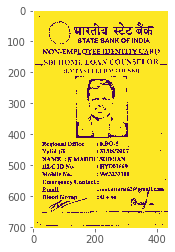

In [4]:
# load the image as a PIL/Pillow image, apply OCR, and then delete the temporary file
pytesseract.pytesseract.tesseract_cmd=r'C:\Program Files (x86)\Tesseract-OCR\tesseract.exe'
text=pytesseract.image_to_string(Image.open(filename))
os.remove(filename)    # delete the temporary file.
print(text)
plt.grid(False)
plt.imshow(gray)


## 2nd method

In [5]:
import cv2
import sys

import pytesseract

if __name__ == '__main__':
    if len(sys.argv) < 2:
        print('Usage: python ocr_simple.py image.jpg')
        sys.exit(1)
    imPath = sys.argv[1]
    config = ('-l eng --oem 3 --psm 3')
im = cv2.imread('./Images/textimage4.jpg', cv2.IMREAD_COLOR)
text = pytesseract.image_to_string(im, config=config)
print(text)

mﬁwtitihi

STATE BANK OF INDIA

NON- E ARD

~\H| HUVIF L(M\ ('()l '\.\F,L()R _.
1} \IP\\H 1 H)\\l|H xnn

 

 

lgtnnloﬂu :RBO-5

Valid lﬂl : MINI2017

NAME : K MADHU SUDIIAN

HLC ID No. : EYD02669

Mobile No. : 9963237158

’ Enetgelcy Coma :
Email : nskotu|ru6JOgI Leon

:0+v¢

   
  
   
 

\4‘\|‘I|I \I (In

   

~.:n.«.n. m .w« H--mu


Tesseract does not do a very good job with dark boundaries and often assumes it to be text. However, if we help Tesseract a bit by cropping out the text region, it gives perfect output.